# 1. Data Preprocessing

In [76]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from datetime import datetime
!pip install openpyxl

In [77]:
# This function cleans a dataframe to change datetime to %Y-%m format
def df_dates_monthly(df, Date = 'Date'):
    clean_df = df.copy()
    clean_df[Date] = pd.to_datetime(clean_df[Date])
    clean_df[Date] = clean_df[Date].dt.strftime('%Y-%m')
    return clean_df

In [78]:
# This function calculates the ChangePercentMonth and ChangePercentYear
def df_change_percent(df, Value = 'Value'):
    clean_df = df.copy()
    clean_df['ChangePercentMonth'] = round(clean_df[Value].pct_change(),4)
    clean_df['ChangePercentYear'] = round(clean_df[Value].pct_change(12),4)
    return clean_df

## 1.1. Consumer Price Index (CPI) Data
Data source: https://www.bls.gov/cpi/data.htm

In [79]:
# Import CPI data and see the head
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data.head()

,Date,Value
0,1913-01-01,9.8
1,1913-02-01,9.8
2,1913-03-01,9.8
3,1913-04-01,9.8
4,1913-05-01,9.7


In [80]:
# Look at the shape of our data
cpi_data.shape

(1311, 2)

In [81]:
# Create a copy of the dataset for our lagged CPI predictor
lagged_cpi_data = cpi_data.copy()

lagged_cpi_data['Date'] = pd.to_datetime(lagged_cpi_data['Date'], format='%Y-%m-%d')

# Move all dates by 1 month ahead of time
lagged_cpi_data['Date'] = lagged_cpi_data['Date'] + pd.DateOffset(months=1)
# Clean data to have date in %Y-%m format
lagged_cpi_data_clean = df_dates_monthly(lagged_cpi_data)
# Clean data to have monthly and yearly percentage changes
lagged_cpi_data_clean = df_change_percent(lagged_cpi_data_clean)


In [82]:
# Clean data to have date in %Y-%m format
cpi_data_clean = df_dates_monthly(cpi_data)
# Clean data to have monthly and yearly percentage changes
cpi_data_clean = df_change_percent(cpi_data_clean)
# Show cleaned data
cpi_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1913-01,9.800,NaN,NaN
1,1913-02,9.800,0.0000,NaN
2,1913-03,9.800,0.0000,NaN
3,1913-04,9.800,0.0000,NaN
4,1913-05,9.700,-0.0102,NaN
...,...,...,...,...
1306,2021-11,277.948,0.0049,0.0681
1307,2021-12,278.802,0.0031,0.0704
1308,2022-01,281.148,0.0084,0.0748
1309,2022-02,283.716,0.0091,0.0787


In [83]:
cpi_data_clean = cpi_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\2124847074.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cpi_data_clean = cpi_data_clean.fillna(method='bfill')


In [84]:
cpi_data_clean.isnull().sum().sum()

0

In [85]:
cpi_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1913-01,9.800,0.0000,0.0204
1,1913-02,9.800,0.0000,0.0204
2,1913-03,9.800,0.0000,0.0204
3,1913-04,9.800,0.0000,0.0204
4,1913-05,9.700,-0.0102,0.0204
...,...,...,...,...
1306,2021-11,277.948,0.0049,0.0681
1307,2021-12,278.802,0.0031,0.0704
1308,2022-01,281.148,0.0084,0.0748
1309,2022-02,283.716,0.0091,0.0787


In [86]:
cpi_data_clean.isna().sum()

Date                  0
Value                 0
ChangePercentMonth    0
ChangePercentYear     0
dtype: int64

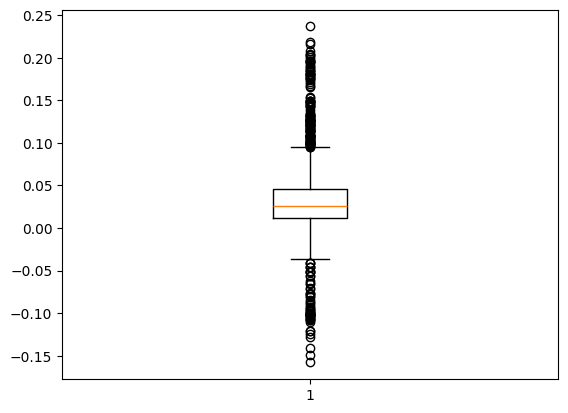

In [87]:
# BoxPlot
plt.boxplot(cpi_data_clean['ChangePercentYear'])
# plt.boxplot(cpi_data_clean)
plt.show()

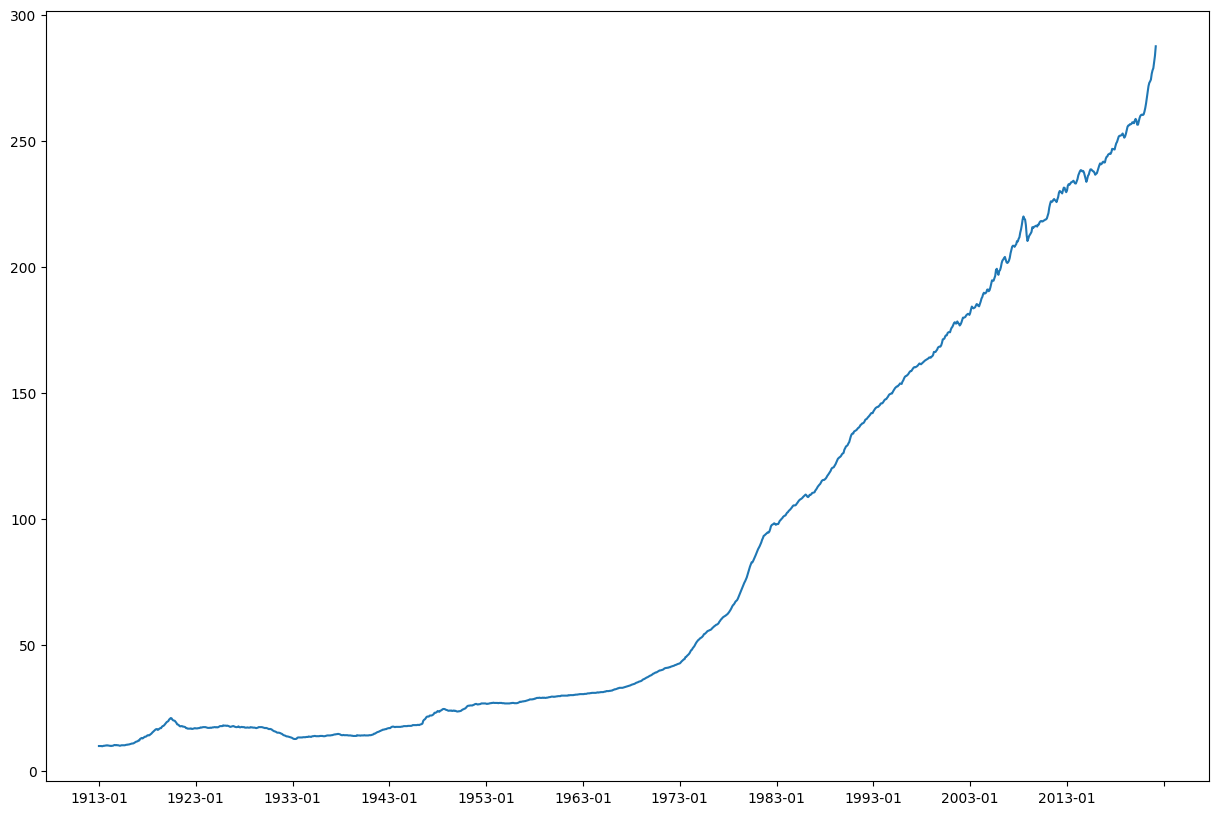

In [88]:
# Plot CPI time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 120)) # show x-axis ticks at every 10 years
plt.plot(cpi_data_clean['Date'], cpi_data_clean['Value'])
plt.show()

## 1.2. Business Inflation Expectation (BIE) Data
Data source: https://www.atlantafed.org/research/inflationproject/bie.aspx


In [89]:
# Import BIE data and see the head
bie_data = pd.read_excel("FedBankOfAtlantaBIE.xlsx")
bie_data.columns = ['Date', 'Value']
bie_data.head()

,Date,Value
0,2011-10-21,0.019269
1,2011-11-18,0.020115
2,2011-12-16,0.018592
3,2012-01-20,0.018283
4,2012-02-17,0.018718


In [90]:
# Look at the shape of our data
bie_data.shape

(127, 2)

In [91]:
# Since this data looks ahead 1 year at inflation, we need to bring the dates forward by 1 year as well
bie_data['Date'] = bie_data['Date'] + pd.DateOffset(months=12)

In [92]:
# Clean BIE data by rounding Value
bie_data['Value'] = round(bie_data['Value'],4)
# Clean data to have date in %Y-%m format
bie_clean = df_dates_monthly(bie_data)
# Clean data to have monthly and yearly percentage changes
bie_clean = df_change_percent(bie_clean)
# Show cleaned data
bie_clean

# Calculate month on month and year on year percentage changes
bie_clean['ChangePercentMonth'] = round(bie_clean['Value'].pct_change(),4)
bie_clean['ChangePercentYear'] = round(bie_clean['Value'].pct_change(12),4)
bie_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,2012-10,0.0193,NaN,NaN
1,2012-11,0.0201,0.0415,NaN
2,2012-12,0.0186,-0.0746,NaN
3,2013-01,0.0183,-0.0161,NaN
4,2013-02,0.0187,0.0219,NaN
...,...,...,...,...
122,2022-12,0.0342,0.0395,0.7273
123,2023-01,0.0338,-0.0117,0.5434
124,2023-02,0.0356,0.0533,0.6330
125,2023-03,0.0378,0.0618,0.5816


In [93]:
bie_clean = bie_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\4221877770.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bie_clean = bie_clean.fillna(method='bfill')


In [94]:
bie_clean.isnull().sum().sum()

0

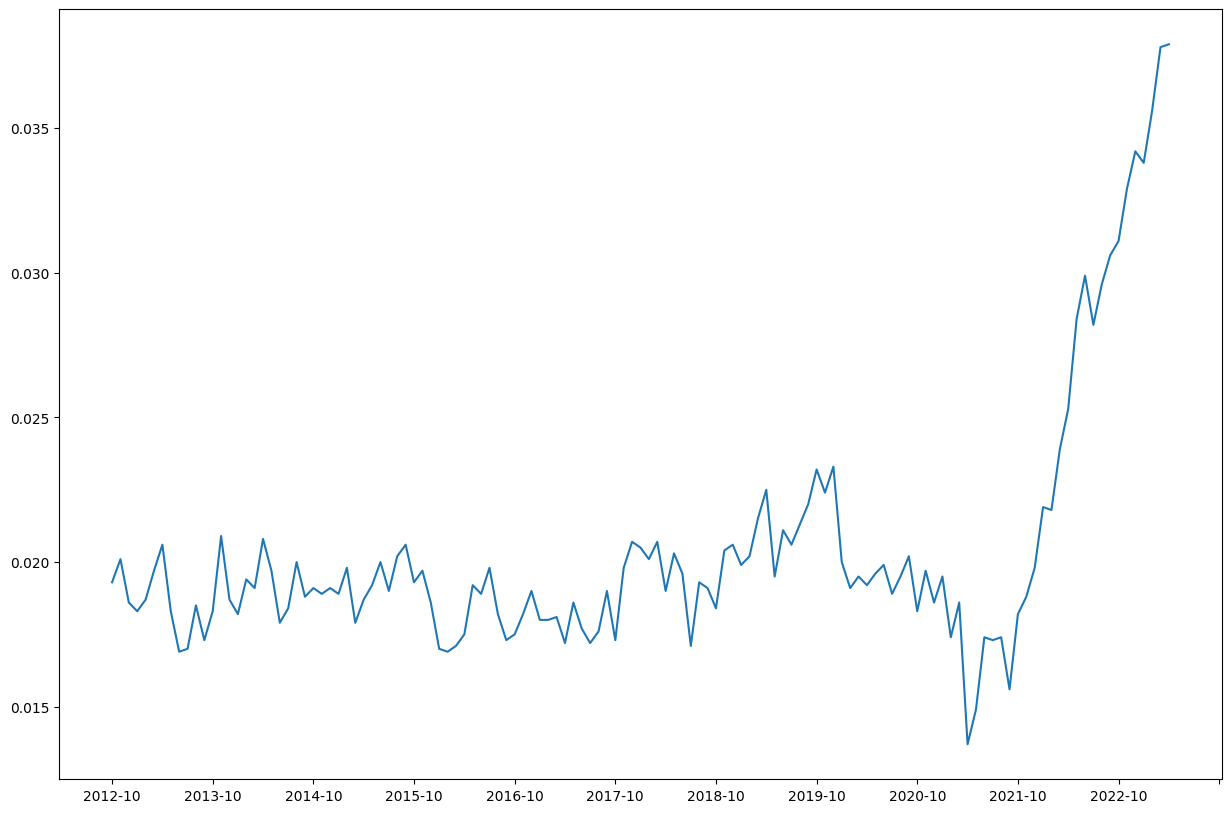

In [95]:
# Plot BIE time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 12)) # show x-axis ticks at every 1 year
plt.plot(bie_clean['Date'], bie_clean['Value'])

## 1.3. Oil Price Data
Data source: https://tradingeconomics.com/commodity/crude-oil

In [96]:
# Import oil price data and see the head
oil_pd = pd.read_csv("crude-oil-price.csv")
oil_pd

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
...,...,...,...,...
464,2021-11-01T00:00:00,65.85,-19.479090,-15.93
465,2021-12-01T00:00:00,74.88,13.712984,9.03
466,2022-01-03T00:00:00,86.49,15.504808,11.61
467,2022-02-01T00:00:00,93.50,8.104983,7.01


In [97]:
# Look at the shape of our data
oil_pd.shape

(469, 4)

In [98]:
# Clean data to have date in %Y-%m format
oil_clean = pd.DataFrame(df_dates_monthly(oil_pd,'date')[['date', 'price']])
oil_clean.columns = ['Date', 'Value']
# Clean data to have monthly and yearly percentage changes
oil_clean = df_change_percent(oil_clean)
# Show cleaned data
oil_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1983-03,29.27,NaN,NaN
1,1983-04,30.63,0.0465,NaN
2,1983-05,30.25,-0.0124,NaN
3,1983-06,31.38,0.0374,NaN
4,1983-07,32.00,0.0198,NaN
...,...,...,...,...
464,2021-11,65.85,-0.1948,0.4524
465,2021-12,74.88,0.1371,0.5433
466,2022-01,86.49,0.1550,0.6569
467,2022-02,93.50,0.0810,0.5203


In [99]:
oil_clean = oil_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\683988030.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil_clean = oil_clean.fillna(method='bfill')


In [100]:
oil_clean.isna().sum().sum()

0

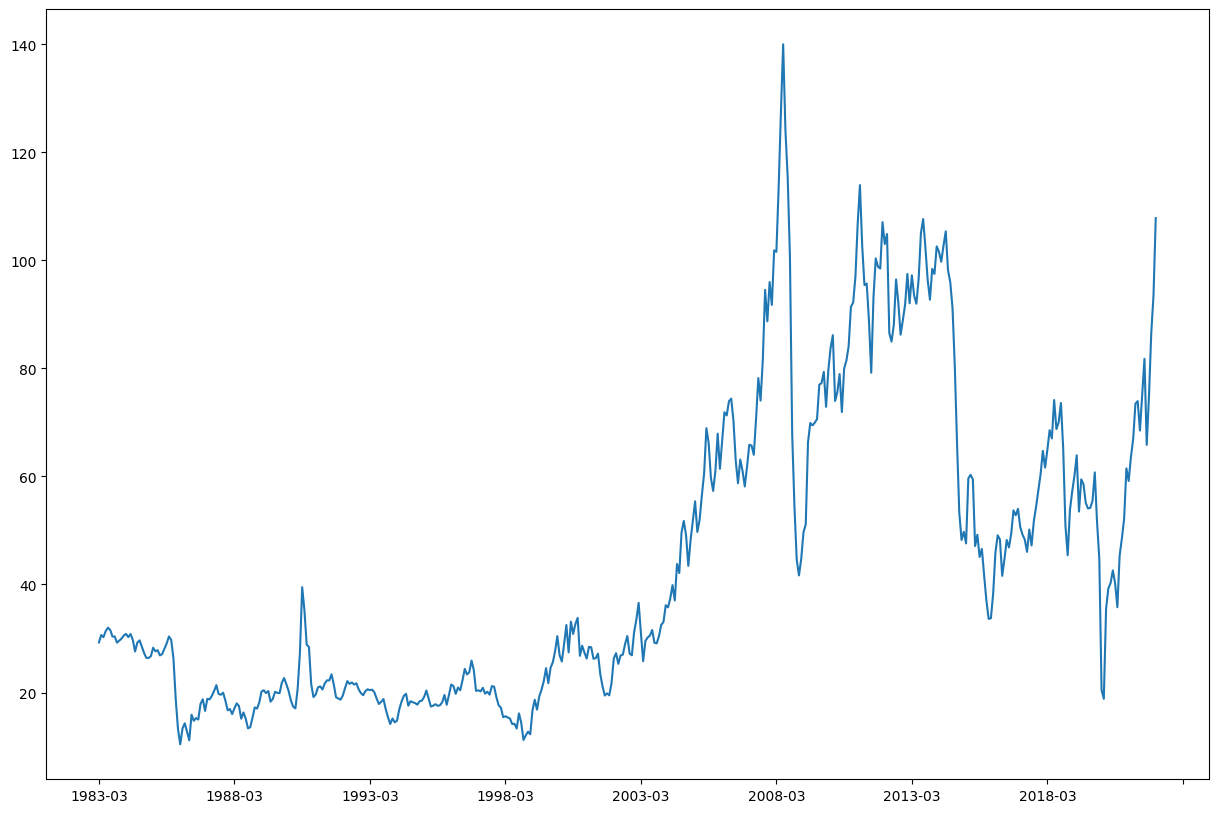

In [101]:
# Plot oil price time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 60)) # show x-axis ticks at every 5 years
plt.plot(oil_clean['Date'], oil_clean['Value'])

## 1.4. Producer Price Index (PPI) Data
Data source: https://fred.stlouisfed.org/series/PPIACO

In [102]:
# Import PPI data and see the head
ppi_data = pd.read_csv("ppi_monthly_data.csv")
ppi_data.columns = ['Date', 'Value']
ppi_data.head()

,Date,Value
0,1913-01-01,12.1
1,1913-02-01,12.0
2,1913-03-01,12.0
3,1913-04-01,12.0
4,1913-05-01,11.9


In [103]:
# Look at the shape of our data
ppi_data.shape

(1311, 2)

In [104]:
# Clean data to have date in %Y-%m format
ppi_data_clean = df_dates_monthly(ppi_data)
# Clean data to have monthly and yearly percentage changes
ppi_data_clean = df_change_percent(ppi_data_clean)
# Show cleaned data
ppi_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1913-01,12.100,NaN,NaN
1,1913-02,12.000,-0.0083,NaN
2,1913-03,12.000,0.0000,NaN
3,1913-04,12.000,0.0000,NaN
4,1913-05,11.900,-0.0083,NaN
...,...,...,...,...
1306,2021-11,243.287,0.0117,0.2269
1307,2021-12,241.327,-0.0081,0.2036
1308,2022-01,246.245,0.0204,0.2024
1309,2022-02,253.180,0.0282,0.2022


In [105]:
ppi_data_clean = ppi_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\3967109107.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ppi_data_clean = ppi_data_clean.fillna(method='bfill')


In [106]:
ppi_data_clean.isnull().sum().sum()

0

In [107]:
ppi_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1913-01,12.100,-0.0083,-0.0248
1,1913-02,12.000,-0.0083,-0.0248
2,1913-03,12.000,0.0000,-0.0248
3,1913-04,12.000,0.0000,-0.0248
4,1913-05,11.900,-0.0083,-0.0248
...,...,...,...,...
1306,2021-11,243.287,0.0117,0.2269
1307,2021-12,241.327,-0.0081,0.2036
1308,2022-01,246.245,0.0204,0.2024
1309,2022-02,253.180,0.0282,0.2022


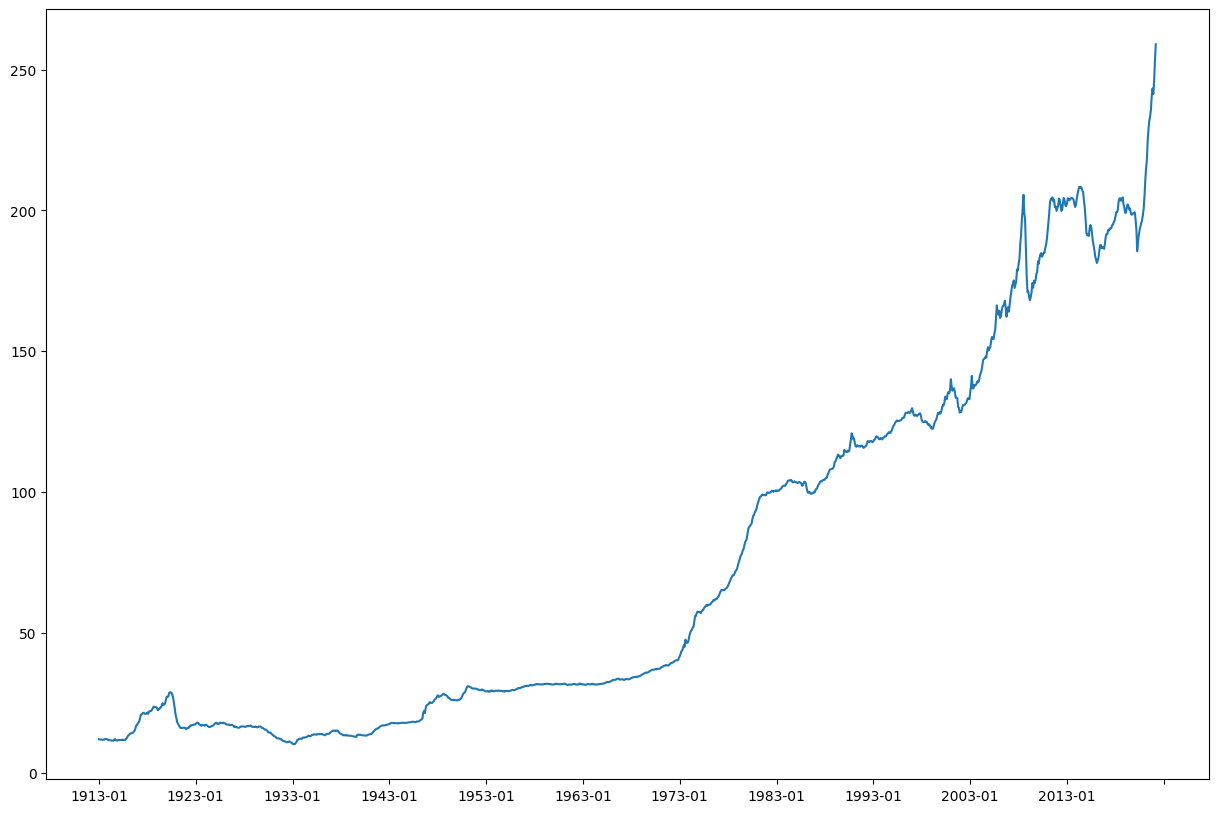

In [108]:
# Plot PPI time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 120)) # show x-axis ticks at every 10 years
plt.plot(ppi_data_clean['Date'], ppi_data_clean['Value'])
plt.show()

## 1.5. Nominal Effective Exchange Rate
Data Source: https://fred.stlouisfed.org/series/NBUSBIS 

In [109]:
# Import NEER data and see the head
neer_pd = pd.read_csv('NBUSBIS.csv')
neer_pd.columns = ['Date', 'Value']
neer_pd

,Date,Value
0,1994-01-01,88.81
1,1994-02-01,88.89
2,1994-03-01,89.52
3,1994-04-01,90.30
4,1994-05-01,90.27
...,...,...
334,2021-11-01,121.78
335,2021-12-01,122.57
336,2022-01-01,121.92
337,2022-02-01,121.84


In [110]:
# Look at the shape of our data
neer_pd.shape

(339, 2)

In [111]:
# Clean data to have date in %Y-%m format
neer_data_clean = df_dates_monthly(neer_pd)
# Clean data to have monthly and yearly percentage changes
neer_data_clean = df_change_percent(neer_data_clean)
# Show cleaned data
neer_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1994-01,88.81,NaN,NaN
1,1994-02,88.89,0.0009,NaN
2,1994-03,89.52,0.0071,NaN
3,1994-04,90.30,0.0087,NaN
4,1994-05,90.27,-0.0003,NaN
...,...,...,...,...
334,2021-11,121.78,0.0079,0.0089
335,2021-12,122.57,0.0065,0.0341
336,2022-01,121.92,-0.0053,0.0331
337,2022-02,121.84,-0.0007,0.0283


In [112]:
neer_data_clean = neer_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\3653658372.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  neer_data_clean = neer_data_clean.fillna(method='bfill')


In [113]:
neer_data_clean.isnull().sum().sum()

0

In [114]:
neer_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1994-01,88.81,0.0009,0.0482
1,1994-02,88.89,0.0009,0.0482
2,1994-03,89.52,0.0071,0.0482
3,1994-04,90.30,0.0087,0.0482
4,1994-05,90.27,-0.0003,0.0482
...,...,...,...,...
334,2021-11,121.78,0.0079,0.0089
335,2021-12,122.57,0.0065,0.0341
336,2022-01,121.92,-0.0053,0.0331
337,2022-02,121.84,-0.0007,0.0283


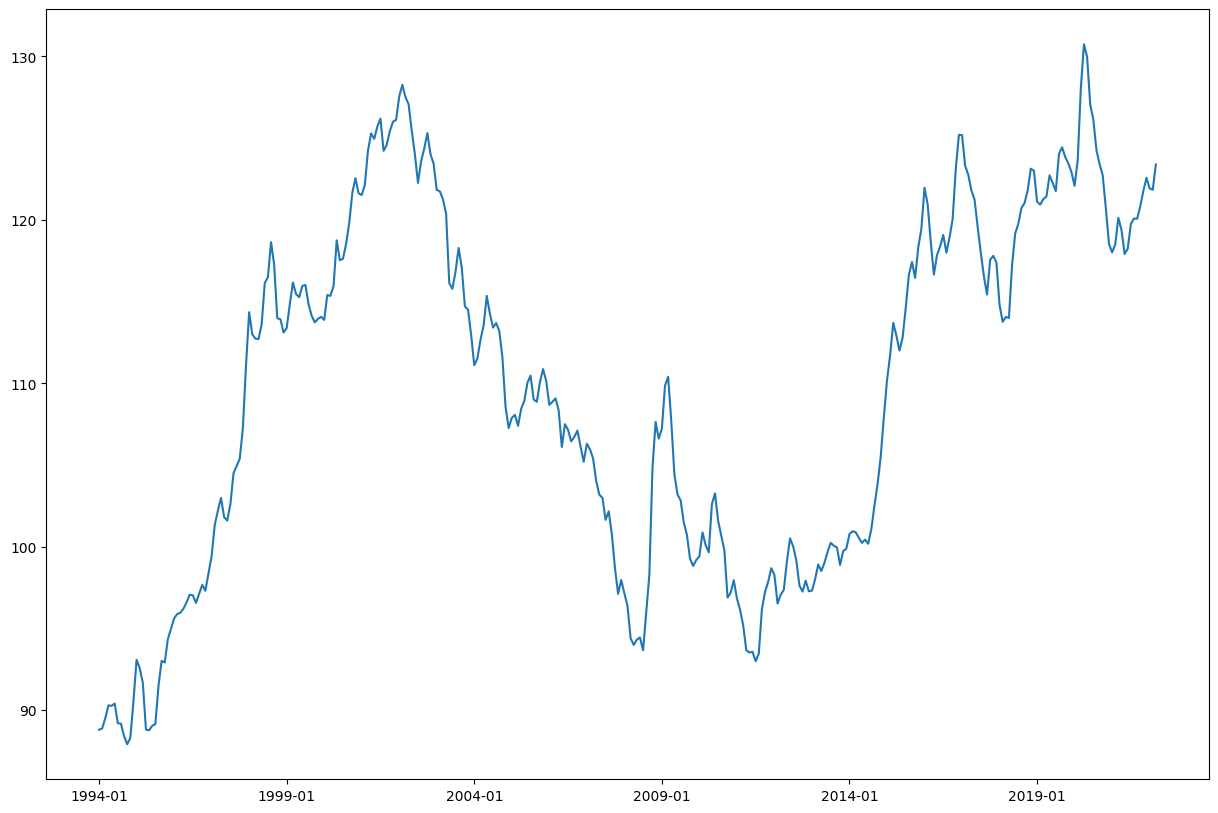

In [115]:
# Plot PPI time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 60)) # show x-axis ticks at every 5 years
plt.plot(neer_data_clean['Date'], neer_data_clean['Value'])
plt.show()

## 1.6. US Unemployment Rate Data
Data source: https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021

In [116]:
# Import enemployment data and see the head
unemp_data = pd.read_csv("unemployment_rate_data.csv")
unemp_data.head()

,date,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over
0,1/1/1948,4.0,4.2,3.5,10.8,9.6,6.6,3.6,2.6,2.7,3.6
1,2/1/1948,4.7,4.7,4.8,15.0,9.5,8.0,4.0,3.2,3.4,4.0
2,3/1/1948,4.5,4.5,4.4,13.2,9.3,8.6,3.5,3.2,2.9,3.5
3,4/1/1948,4.0,4.0,4.1,9.9,8.1,6.8,3.5,3.1,2.9,3.2
4,5/1/1948,3.4,3.3,3.4,6.4,7.2,6.3,2.8,2.5,2.3,2.9


In [117]:
# Look at the shape of our data
unemp_data.shape

(887, 11)

In [118]:
# Clean unemployment data to keep columns Date and unemployment rate
unemp_data_clean = pd.DataFrame(unemp_data[['date','unrate']])
unemp_data_clean.columns = ['Date', 'Value']

# Clean data to have date in %Y-%m format
unemp_data_clean = df_dates_monthly(unemp_data_clean)
# Clean data to have monthly and yearly percentage changes
unemp_data_clean = df_change_percent(unemp_data_clean)
# Show cleaned data
unemp_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,1948-01,4.0,NaN,NaN
1,1948-02,4.7,0.1750,NaN
2,1948-03,4.5,-0.0426,NaN
3,1948-04,4.0,-0.1111,NaN
4,1948-05,3.4,-0.1500,NaN
...,...,...,...,...
882,2021-07,5.7,-0.0656,-0.4571
883,2021-08,5.3,-0.0702,-0.3765
884,2021-09,4.6,-0.1321,-0.4026
885,2021-10,4.3,-0.0652,-0.3485


In [119]:
unemp_data_clean = unemp_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\4145607913.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  unemp_data_clean = unemp_data_clean.fillna(method='bfill')


In [120]:
unemp_data_clean.isnull().sum().sum()

0

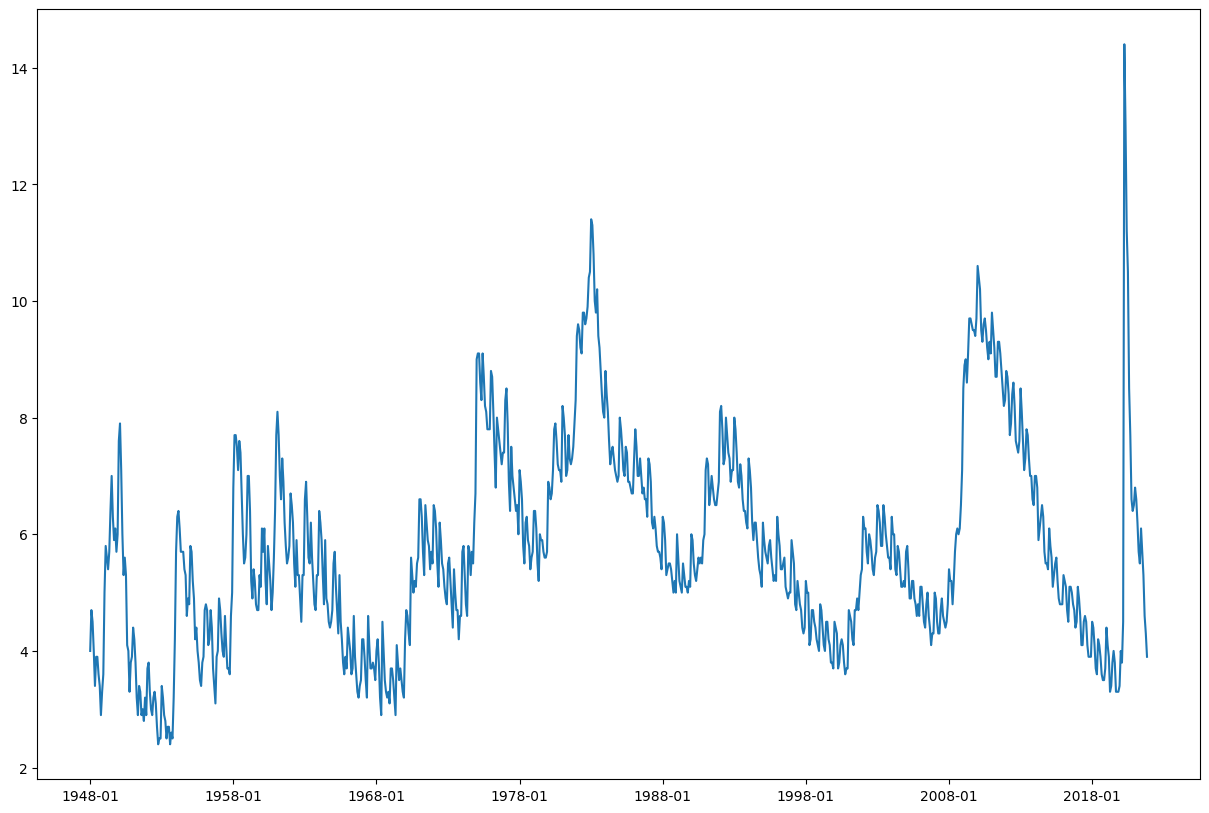

In [121]:
# Plot unemloyment rate time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 120)) # show x-axis ticks at every 10 years
plt.plot(unemp_data_clean['Date'], unemp_data_clean['Value'])
plt.show()

## 1.7. S&P 500 Monthly Data

In [122]:
# Import S&P500 data and see the head
sp_data = pd.read_csv("sp500_monthly_data.csv")
sp_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,Apr 22,"4,457.30","4,547.90","4,593.90","4,369.63",-,-1.61%
1,Mar 22,"4,530.41","4,358.08","4,637.90","4,157.20",-,3.58%
2,Feb 22,"4,373.79","4,521.35","4,595.10","4,114.50",-,-3.14%
3,Jan 22,"4,515.55","4,781.00","4,817.88","4,221.54",-,-5.26%
4,Dec 21,"4,766.18","4,623.80","4,808.52","4,494.20",-,4.36%


In [123]:
# Look at the shape of our data
sp_data.shape

(627, 7)

In [124]:
# Clean data to have date in %Y-%m format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%b %y')
sp_data = df_dates_monthly(sp_data)
# Clean S&P data to keep only Date and Value columns, sorted in ascending order of date
sp_data_clean = pd.DataFrame(sp_data[['Date','Price']])
sp_data_clean.columns = ['Date', 'Value']
sp_data_clean['Value'] = sp_data_clean['Value'].str.replace(',', '').astype(float)
sp_data_clean.sort_values(by=['Date'], inplace=True)
# Clean data to have monthly and yearly percentage changes
sp_data_clean = df_change_percent(sp_data_clean)
# Show cleaned data
sp_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
626,1970-02,89.50,NaN,NaN
625,1970-03,89.63,0.0015,NaN
624,1970-04,81.52,-0.0905,NaN
623,1970-05,76.55,-0.0610,NaN
622,1970-06,72.72,-0.0500,NaN
...,...,...,...,...
4,2021-12,4766.18,0.0436,0.2689
3,2022-01,4515.55,-0.0526,0.2157
2,2022-02,4373.79,-0.0314,0.1476
1,2022-03,4530.41,0.0358,0.1403


In [125]:
sp_data_clean = sp_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\1595904611.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp_data_clean = sp_data_clean.fillna(method='bfill')


In [126]:
sp_data_clean.isnull().sum().sum()

0

In [127]:
sp_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
626,1970-02,89.50,0.0015,0.0810
625,1970-03,89.63,0.0015,0.0810
624,1970-04,81.52,-0.0905,0.0810
623,1970-05,76.55,-0.0610,0.0810
622,1970-06,72.72,-0.0500,0.0810
...,...,...,...,...
4,2021-12,4766.18,0.0436,0.2689
3,2022-01,4515.55,-0.0526,0.2157
2,2022-02,4373.79,-0.0314,0.1476
1,2022-03,4530.41,0.0358,0.1403


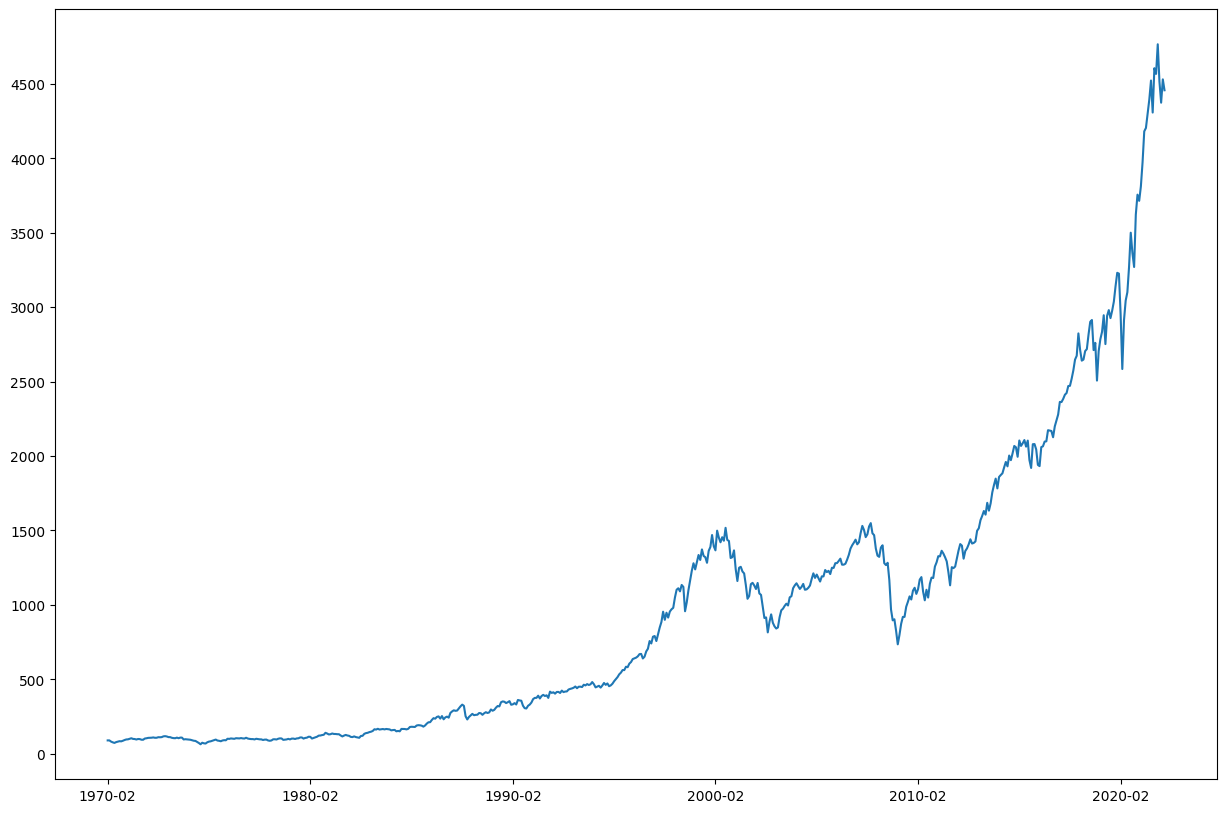

In [128]:
# Plot S&P500 time series graph
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 2000, 120)) # show x-axis ticks at every 10 years
plt.yticks(np.arange(0, 5000, 500)) # show y-axis ticks at every $500
plt.plot(sp_data_clean['Date'], sp_data_clean['Value'])
plt.show()

## 1.8. Bitcoin Price

In [129]:
# Import bitcoin data and see the head
bitcoin_data = pd.read_csv("bitcoin_monthly_data.csv")
bitcoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,216.867004,265.610992,212.014999,254.263000,254.263000,711518700


In [130]:
# Look at the shape of our data
bitcoin_data.shape

(92, 7)

In [131]:
# Clean bitcoin data to where price is now the average between the high and low prices for the month
bitcoin_data['Value'] = (bitcoin_data['High'] + bitcoin_data['Low']) / 2
bitcoin_data_clean = pd.DataFrame(bitcoin_data[['Date','Value']])
# Clean bitcoin data to have date in %Y-%m format
bitcoin_data_clean = df_dates_monthly(bitcoin_data_clean)
# Clean data to have monthly and yearly percentage changes
bitcoin_data_clean = df_change_percent(bitcoin_data_clean)
# Show cleaned data
bitcoin_data_clean

,Date,Value,ChangePercentMonth,ChangePercentYear
0,2014-10,350.496994,NaN,NaN
1,2014-11,388.859497,0.1095,NaN
2,2014-12,344.134995,-0.1150,NaN
3,2015-01,245.972497,-0.2852,NaN
4,2015-02,238.812995,-0.0291,NaN
...,...,...,...,...
87,2022-01,40532.732422,-0.2046,0.1471
88,2022-02,40060.195312,-0.0117,-0.1168
89,2022-03,42673.519532,0.0652,-0.2009
90,2022-04,43004.833985,0.0078,-0.2322


In [132]:
bitcoin_data_clean = bitcoin_data_clean.fillna(method='bfill')

C:\Users\Suryanshu Choudhary\AppData\Local\Temp\ipykernel_9564\3199213467.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bitcoin_data_clean = bitcoin_data_clean.fillna(method='bfill')


In [133]:
bitcoin_data_clean.isnull().sum().sum()

0

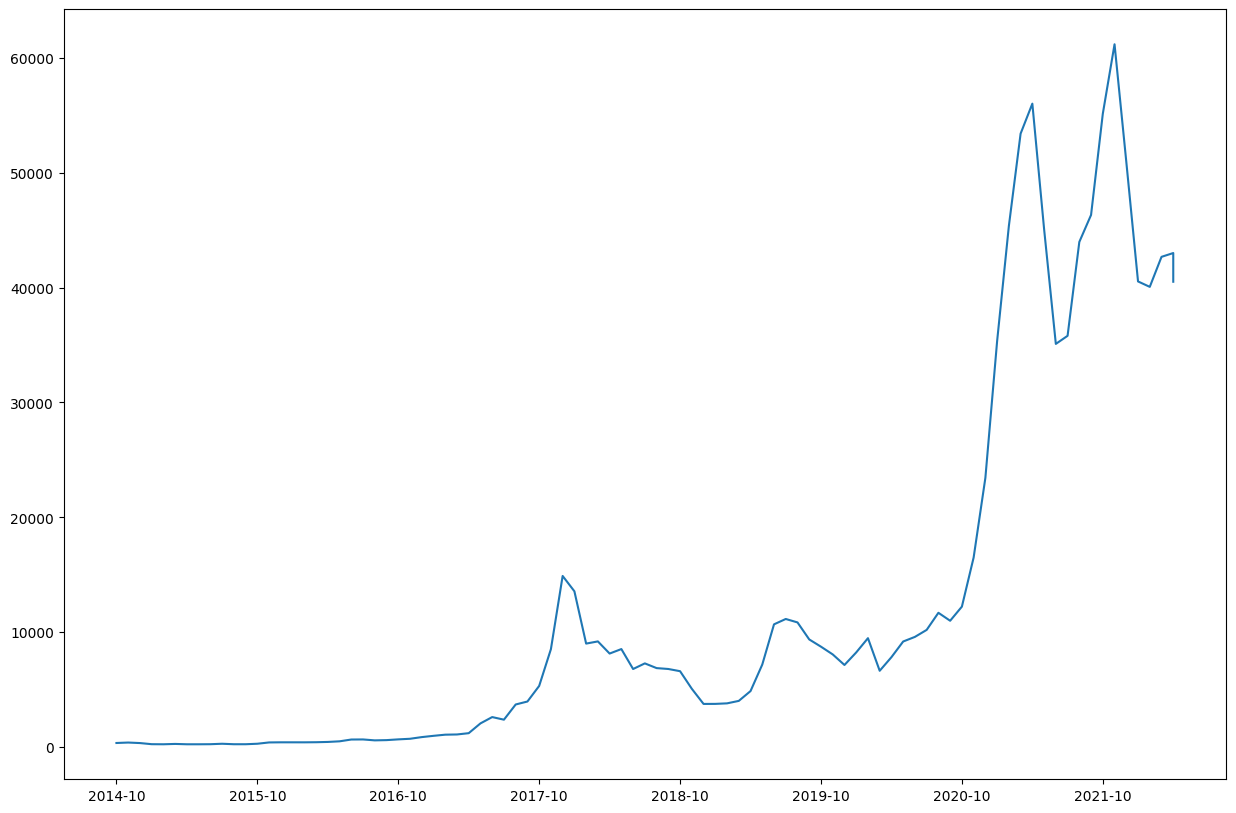

In [134]:
# Plot the bitcoin time series graph (of bitcoin price over time)
plt.figure(figsize=(15,10))
plt.xticks(np.arange(0, 100, 12)) # show x-axis ticks at every one year
plt.plot(bitcoin_data_clean['Date'], bitcoin_data_clean['Value'])
plt.show()

# Export to CSV

In [140]:
# Export to CSV
cpi_data_clean.to_csv('cleaned_cpi.csv', index=False)
bie_clean.to_csv('cleaned_bie.csv', index=False)
oil_clean.to_csv('cleaned_oil.csv', index=False)
ppi_data_clean.to_csv('cleaned_ppi.csv', index=False)
unemp_data_clean.to_csv('cleaned_unemp.csv', index=False)
bitcoin_data_clean.to_csv('cleaned_bitcoin.csv', index=False)
neer_data_clean.to_csv('cleaned_neer.csv', index=False)
lagged_cpi_data_clean.to_csv('cleaned_lagged_cpi.csv', index=False)
sp_data_clean.to_csv('cleaned_sp.csv', index=False)